In [ ]:
import os
import requests
import pandas as pd

url = 'https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz'
fname = os.path.basename(url)

if not os.path.isfile(fname):
    print(f"Downloading...\n{url}")
    r = requests.get(url, allow_redirects=True)
    open(fname, 'wb').write(r.content)
else:
    print(f"Already downloaded:\n{url}")
    
# parse the file
cols = ['source', 'target', 'rating', 'time']
df = pd.read_csv(fname, names=cols, header=None)
df['time'] = pd.to_datetime(df.time * 1e9)
df = df.set_index('time')
df.shape

Downloading...
https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz


(35592, 3)

In [ ]:
from datetime import datetime

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math

# DG = nx.MultiDiGraph()
fxg_G = nx.DiGraph()
edges = [(t.source, t.target, float(t.rating)/10) for t in df.itertuples()]
fxg_G.add_weighted_edges_from(edges)

print(f"Nodes: {fxg_G.number_of_nodes()}")
print(f"Edges: {fxg_G.number_of_edges()}")

Nodes: 5881
Edges: 35592


In [ ]:
def initialize_scores(G):
    fairness = {}
    goodness = {}
    
    nodes = G.nodes()
    for node in nodes:
        fairness[node] = 1
        try:
            goodness[node] = G.in_degree(node, weight='weight')*1.0/G.in_degree(node)
        except:
            goodness[node] = 0
    return fairness, goodness

def compute_fairness_goodness(G):
    fairness, goodness = initialize_scores(G)
    
    nodes = G.nodes()
    iter = 0
    while iter < 100:
        df = 0
        dg = 0

        # print '-----------------'
        # print "Iteration number", iter
        
        # print 'Updating goodness'
        for node in nodes:
            inedges = G.in_edges(node, data='weight')
            # print(inedges)
            g = 0
            for edge in inedges:
                g += fairness[edge[0]]*edge[2]

            try:
                dg += abs(g/len(inedges) - goodness[node])
                goodness[node] = g/len(inedges)
            except:
                pass

        # print 'Updating fairness'
        for node in nodes:
            outedges = G.out_edges(node, data='weight')
            f = 0
            for edge in outedges:
                f += 1.0 - abs(edge[2] - goodness[edge[1]])/2.0
            try:
                df += abs(f/len(outedges) - fairness[node])
                fairness[node] = f/len(outedges)
            except:
                pass
        
        # print 'Differences in fairness score and goodness score = %.2f, %.2f' % (df, dg)
        if df < math.pow(10, -6) and dg < math.pow(10, -6):
            break
        iter+=1
    
    return fairness, goodness

# skip = int(sys.argv[1])

# G = nx.DiGraph()

# f = open("network.csv","r")
# for l in f:
#     ls = l.strip().split(",")
#     G.add_edge(ls[0], ls[1], weight = float(ls[2])) ## the weight should already be in the range of -1 to 1
# f.close()

In [ ]:
# these two dictionaries have the required scores
fairness, goodness = compute_fairness_goodness(fxg_G)

In [ ]:
fxg = {}

for key, fair in fairness.items():
  # fxg[key] = (fair * goodness[key] + 1)/2
  # fxg[key] = 0.2 * fair + 0.8 * ((goodness[key] + 1)/2)
  fxg[key] = (goodness[key] + 1)/2

len(fxg)

a1_sorted_keys = sorted(fxg, key=fxg.get, reverse=True)
i = 0
for r in a1_sorted_keys:
    print(r, fxg[r])
    i += 1
    if (i == 10):
      break


3484 1.0
5761 0.9962080076232145
1545 0.9960796149325183
529 0.9934695700201348
5568 0.9902718421927874
3975 0.989066025239463
1663 0.9882618093387281
5438 0.9860582859131459
5960 0.9786854424539722
5824 0.9767812657746211


In [ ]:
################ PAGERANK

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import math

# DG = nx.MultiDiGraph()
pagerank_G = nx.DiGraph()
edges = [(t.source, t.target, (float(t.rating) + 11)) for t in df.itertuples()]
pagerank_G.add_weighted_edges_from(edges)

print(f"Nodes: {pagerank_G.number_of_nodes()}")
print(f"Edges: {pagerank_G.number_of_edges()}")
regular_pagerank = nx.pagerank(pagerank_G, weight="weight")


# edges


Nodes: 5881
Edges: 35592


In [ ]:
personalized_pagerank = nx.pagerank(pagerank_G, weight='weight', personalization=fxg, max_iter =  100)

In [ ]:
# personalized_pagerank
fxg

{6: 0.5650879934878877,
 2: 0.6347655945067434,
 5: 0.607084018826802,
 1: 0.6619665098602748,
 15: 0.5722327188648804,
 4: 0.6433000424421714,
 3: 0.48210223601869673,
 13: 0.5836864316950547,
 16: 0.8782252022072682,
 10: 0.7760308516594709,
 7: 0.632787171800328,
 21: 0.6123825486852008,
 20: 0.5912052089314458,
 8: 0.7516092560736913,
 17: 0.6148653760260447,
 23: 0.6473522037125402,
 25: 0.621765316589833,
 26: 0.5724761087632662,
 28: 0.5779967545985888,
 29: 0.5908750699642895,
 31: 0.5684040008540328,
 32: 0.545972454314565,
 34: 0.5468640640397913,
 35: 0.5865823963635703,
 36: 0.5870672395489208,
 37: 0.5634724661983476,
 44: 0.3788488557196422,
 39: 0.6465221849894701,
 45: 0.6270537099502236,
 19: 0.6207258610512231,
 46: 0.5483965675117498,
 47: 0.5927788418139835,
 51: 0.5884963836159742,
 52: 0.5486396223679777,
 53: 0.6405246124983521,
 54: 0.6003473875365388,
 41: 0.5779034566519036,
 55: 0.5471922209512146,
 57: 0.6085967487407979,
 61: 0.4809437420492193,
 65: 0.5491

In [ ]:
a1_sorted_keys = sorted(personalized_pagerank, key=personalized_pagerank.get, reverse=True)
i = 0

top_5 = {}

for r in a1_sorted_keys:
    top_5[(r, i)] = [0]
    print(r, personalized_pagerank[r])
    i += 1
    if (i == 5):
      break

len(a1_sorted_keys)

35 0.015751152134052697
2642 0.011829600135701735
1810 0.006879462766462496
7 0.006659838456813436
2028 0.006559777874597053


5881

In [ ]:
top_5

{(7, 3): [0], (35, 0): [0], (1810, 2): [0], (2028, 4): [0], (2642, 1): [0]}

In [ ]:
ind = []
for i in top_5.keys():
  ind.append(i[0])

ind

[35, 2642, 1810, 7, 2028]

In [ ]:
df.index

DatetimeIndex(['2010-11-08 18:45:11.728359936',
               '2010-11-08 18:45:41.533780224',
               '2010-11-08 19:05:40.390490112',
               '2010-11-08 19:41:17.369750016',
               '2010-11-08 22:10:54.447459840',
               '2010-11-08 22:11:40.795140096',
               '2010-11-10 04:18:20.479130112',
               '2010-11-10 06:29:16.809380096',
               '2010-11-10 06:30:22.214729984',
               '2010-11-10 09:23:01.527869952',
               ...
               '2016-01-20 19:13:25.108169984',
               '2016-01-20 19:16:53.579799808',
               '2016-01-20 19:22:41.371650048',
               '2016-01-23 13:32:45.540189952',
               '2016-01-24 04:53:07.232110080',
               '2016-01-24 05:14:41.647290112',
               '2016-01-24 23:50:28.049489920',
               '2016-01-24 23:50:34.034019840',
               '2016-01-24 23:53:52.985709824',
                  '2016-01-25 01:12:03.757280'],
              dtype=

In [ ]:
month_lst = []
ts = list(df.index)
for dt in ts:
  dt = dt.to_pydatetime()
  dt = dt.strftime('%Y/%m')
  if dt not in month_lst:
    month_lst.append(dt)

month_lst

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)


['2010/11',
 '2010/12',
 '2011/01',
 '2011/02',
 '2011/03',
 '2011/04',
 '2011/05',
 '2011/06',
 '2011/07',
 '2011/08',
 '2011/09',
 '2011/10',
 '2011/11',
 '2011/12',
 '2012/01',
 '2012/02',
 '2012/03',
 '2012/04',
 '2012/05',
 '2012/06',
 '2012/07',
 '2012/08',
 '2012/09',
 '2012/10',
 '2012/11',
 '2012/12',
 '2013/01',
 '2013/02',
 '2013/03',
 '2013/04',
 '2013/05',
 '2013/06',
 '2013/07',
 '2013/08',
 '2013/09',
 '2013/10',
 '2013/11',
 '2013/12',
 '2014/01',
 '2014/02',
 '2014/03',
 '2014/04',
 '2014/05',
 '2014/06',
 '2014/07',
 '2014/08',
 '2014/09',
 '2014/10',
 '2014/11',
 '2014/12',
 '2015/01',
 '2015/02',
 '2015/03',
 '2015/04',
 '2015/05',
 '2015/06',
 '2015/07',
 '2015/08',
 '2015/09',
 '2015/10',
 '2015/11',
 '2015/12',
 '2016/01']

In [ ]:
len(month_lst)

63

In [ ]:
new_df = df[:]
months_lst = []
for index,row in new_df.iterrows():
  months_lst.append(index.to_pydatetime().strftime('%Y/%m'))
  
# months_lst

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Discarding nonzero nanoseconds in conversion
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
len(months_lst)

35592

In [ ]:
new_df['month'] = months_lst
new_df = new_df.set_index('month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
new_df

,source,target,rating
month,,,
2010/11,6,2,4
2010/11,6,5,2
2010/11,1,15,1
2010/11,4,3,7
2010/11,13,16,8
...,...,...,...
2016/01,4499,1810,1
2016/01,2731,3901,5
2016/01,2731,4897,5


In [ ]:
type(list(new_df.index))

list

In [ ]:
for elem in top_5.keys():
  print(top_5[elem])

[0]
[0]
[0]
[0]
[0]


In [ ]:
top_5[(7,3)]

[0]

In [ ]:
lst = [1,2,3]
# lst.append(lst[:-1])
lst[-1]

3

In [ ]:
for month in month_lst:
  # print(month)
  df_month = new_df[0:0]
  for index,row in new_df.iterrows():
    if index == month and row['target'] in ind:
      df_month.loc[len(df_month.index)] = row
  
  df_month = df_month.groupby(['target']).mean()
  for index2,row2 in df_month.iterrows():
    for elem in top_5.keys():
      if index2 == elem[0]:
        top_5[elem].append(row2['rating'])
        break

  # for elem2 in top_5.keys():
  #   # print(top_5[elem2])
  #   flag = 0
  #   for index2,row2 in df_month.iterrows():
  #     if index2 == elem2[0]:
  #       top_5[elem2].append(row2['rating'])
  #       flag = 1
  #       break

  #   if flag == 0:
  #     top_5[elem2].append(top_5[elem2][-1])
  
  for elem2 in top_5.keys():
    if elem2[0] not in list(df_month.index):
      # top_5[elem2].append(top_5[elem2][-1]) 
      top_5[elem2].append(0)  
  
  # print(df_month)
  # print(top_5.values())  
  
  

# df_month



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
final_dict = top_5.copy()

In [ ]:
for elem in top_5.keys():
  top_5[elem] = top_5[elem][1:]


In [ ]:
final_dict = {}
for elem in top_5.keys():
  if elem[1] == 0:
    s = 'one'
  
  if elem[1] == 1:
    s = 'two'

  if elem[1] == 2:
    s = 'three'

  if elem[1] == 3:
    s = 'four'

  if elem[1] == 4:
    s = 'five'

  final_dict[s] = top_5[elem]

In [ ]:
final_dict

{'five': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1.6666666666666667,
  2.3125,
  1.6428571428571428,
  2.15,
  2.391304347826087,
  1.9111111111111112,
  1.8928571428571428,
  2.0,
  2.347826086956522,
  3.1176470588235294,
  2.933333333333333,
  -4.142857142857143,
  -6.0,
  -8.2,
  -8.2,
  0,
  0,
  -8.0,
  0,
  0,
  0,
  -10.0,
  -6.0,
  -5.5,
  0,
  -8.666666666666666,
  0,
  -10.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'four': [2.3333333333333335,
  2.4444444444444446,
  2.1666666666666665,
  3.1818181818181817,
  2.0,
  2.8214285714285716,
  2.901639344262295,
  3.260869565217391,
  6.333333333333333,
  3.5,
  3.5,
  0,
  4.0,
  3.4,
  4.333333333333333,
  1.0,
  2.0,
  1.0,
  4.333333333333333,
  3.6666666666666665,
  2.25,
  1.6,
  3.0,
  2.0,
  1.0,
  1.0,
  0,
  0,
  0,
  0,
  0,
  0,
  6.0,
  0,
  0,
  1.0,
  0,
  0,
  0,
  1.3333333333333333,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [ ]:
final_df = pd.DataFrame.from_dict(final_dict)

In [ ]:
final_df['month'] = month_lst
final_df

,one,two,three,four,five,month
0,0.0,0.0,0.000000,2.333333,0.0,2010/11
1,2.0,0.0,0.000000,2.444444,0.0,2010/12
2,1.0,0.0,0.000000,2.166667,0.0,2011/01
3,0.0,0.0,0.000000,3.181818,0.0,2011/02
4,2.0,0.0,0.000000,2.000000,0.0,2011/03
...,...,...,...,...,...,...
58,0.0,0.0,2.000000,0.000000,0.0,2015/09
59,1.4,0.0,0.000000,0.000000,0.0,2015/10
60,0.0,0.0,0.000000,0.000000,0.0,2015/11
61,0.0,0.0,2.500000,0.000000,0.0,2015/12


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(final_df, x="month", y=['one','two','three','four','five'])
fig.show()

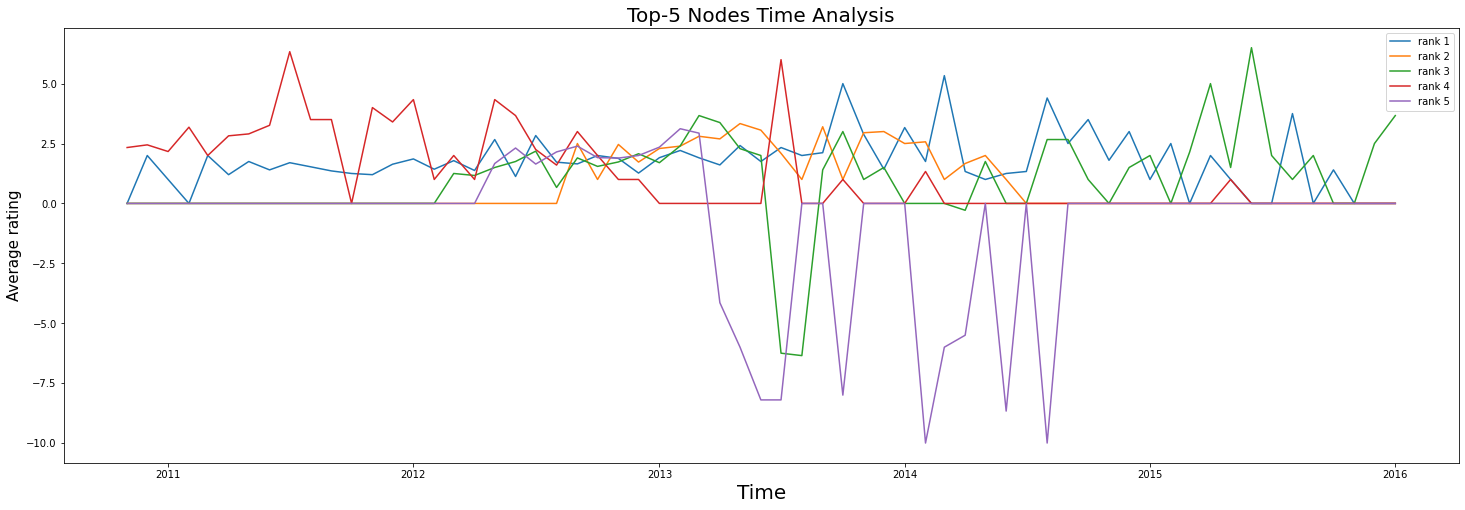

In [ ]:
final_df['month'] = pd.to_datetime(final_df.month)
x = final_df['month']
# x = final_x

y = final_df['one']
y2 = final_df['two']
y3 = final_df['three']
y4 = final_df['four']
y5 = final_df['five']
# plt.plot(x,y, label = 'rank 1')
# plt.plot(x,y2, label = 'rank 2')
# plt.legend()
# plt.show()
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)
plt.title('Top-5 Nodes Time Analysis', fontsize = '20')
plt.plot(x,y, label = 'rank 1')
plt.plot(x,y2, label = 'rank 2')
plt.plot(x, y3, label = 'rank 3')
plt.plot(x, y4, label = 'rank 4')
plt.plot(x, y5, label = 'rank 5')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Average rating', fontsize = 15)
# plt.xticks
plt.legend()
plt.show()

In [ ]:
list(final_df['month'])

In [ ]:
final_x = []
final_x.append('2010')
final_x.append(' ')
final_x.append('2011')
for i in range(11):
  final_x.append(' ')
final_x.append('2012')
for i in range(11):
  final_x.append(' ')
final_x.append('2013')
for i in range(11):
  final_x.append(' ')
final_x.append('2014')
for i in range(11):
  final_x.append(' ')
final_x.append('2015')
for i in range(11):
  final_x.append(' ')
final_x.append('2016')
len(final_x)
final_x

['2010',
 ' ',
 '2011',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2012',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2013',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2014',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2015',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '2016']